In [1]:
import numpy as np
from model_code import fastModel
from numba_progress import ProgressBar

In [7]:
# number of ß steps
ß_steps = 60

# upper and lower bounds of ß
ß_info = (0, 6, ß_steps)

# values of m: (for 3: 4, 16, 64)
M_values = 3

# number of samples per parameter combinations
no_of_simulations = 50

# number of agents
N = 100

# number of base iterations
base_iterations = 250

# run the simulation
with ProgressBar(total=ß_steps) as progress:
    red, exp = fastModel.SystematicParameterAnalysis(ß_info, M_values, no_of_simulations, progress, N, base_iterations)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
print(red.shape)

In [4]:
from model_code import utilities_visuals as us
import matplotlib.pyplot as plt

def consensrate_withrespect_M_against_beta(SyPaAn_data, Ms):

    fig = plt.figure(figsize=(13, 7))
    fontsize = 14
    plt.rc('xtick',labelsize=fontsize-1)
    plt.rc('ytick',labelsize=fontsize-1)

    number = len(Ms)+4
    cmap = plt.get_cmap('autumn')
    colors = [cmap(i) for i in np.linspace(0, 1, number)]
    colors.reverse()

    for i, (color, edgecolor, M) in enumerate(zip(colors[2:-2], colors[4:], Ms)):
        SyPaAn_data_M = SyPaAn_data[:,i,:]
        #consensus_rate = np.mean(SyPaAn_data_M, axis=1)
        consensus_rate = np.mean(np.where(SyPaAn_data_M<0.01, 1, 0), axis=1)

        plt.plot(consensus_rate, lw=3, color = color, marker="o", markeredgewidth=1, markeredgecolor=edgecolor,
                 label=fr"Consens Rate for $M = {M}$ at $T = {int(M/4)*1000}$")
                 #label=fr"Consens Rate for $M = {M}$ at $T = {M * 1000}$")

    plt.xticks(np.arange(0,SyPaAn_data.shape[0],1), np.linspace(0, 5.8, SyPaAn_data.shape[0]).round(2),rotation=90)
    plt.title(fr"Consens Rate at different M's with $T = M/4 * 1000$", fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.xlabel(r"$\beta$", fontsize=fontsize)
    plt.ylabel("Consens Rate", fontsize=fontsize)

    #plt.savefig(f"consensrate_withrespect_M_against_beta{SyPaAn_data[0]['model_type']}.svg", format="svg")
    plt.show()

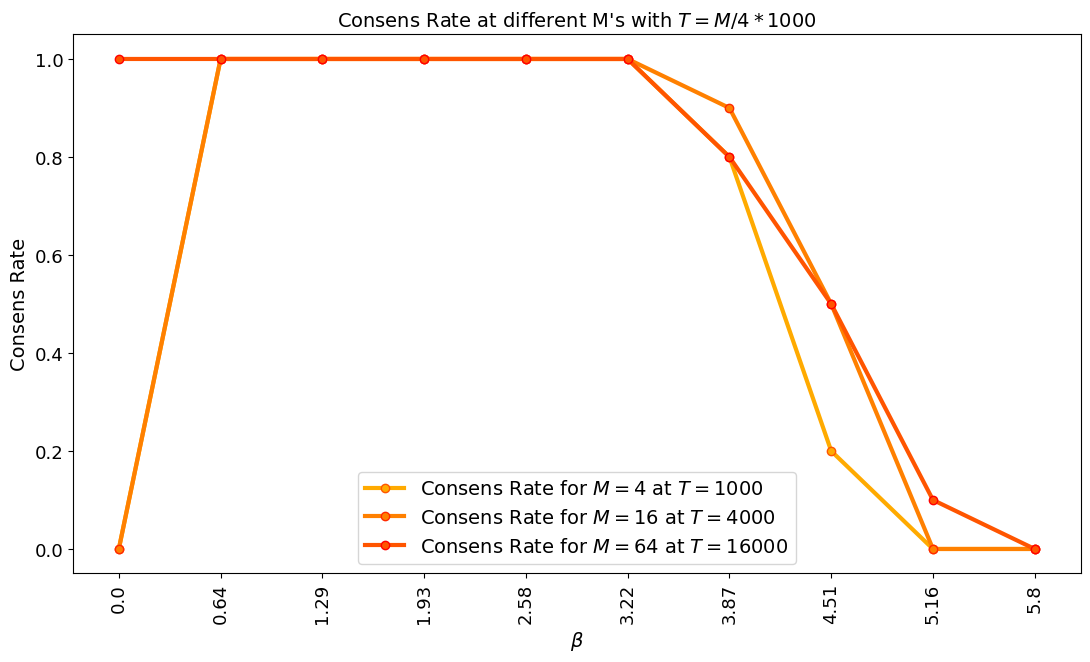

In [5]:
consensrate_withrespect_M_against_beta(red, [4,16,64])

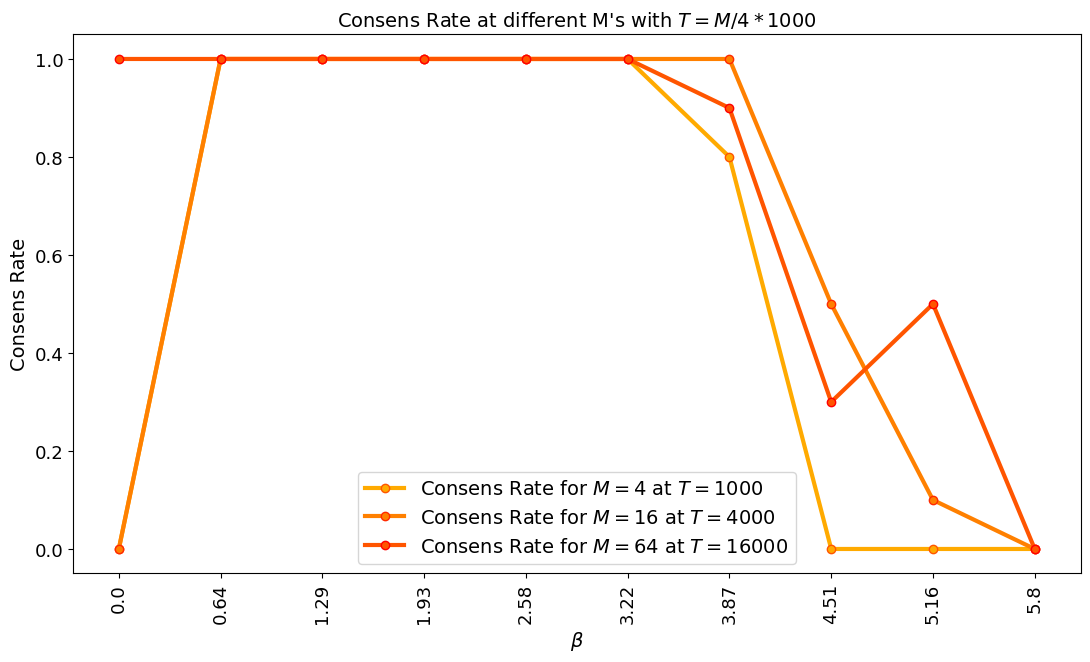

In [6]:
consensrate_withrespect_M_against_beta(exp, [4,16,64])

In [10]:

red_ßs30_ßlim_0_6_Ms_3_noS_10_manyit = red
exp_ßs30_ßlim_0_6_Ms_3_noS_10_manyit = exp

%store red_ßs30_ßlim_0_6_Ms_3_noS_10_manyit
%store exp_ßs30_ßlim_0_6_Ms_3_noS_10_manyit

%store -r red_ßs30_ßlim_0_6_Ms_3_noS_10_manyit
%store -r exp_ßs30_ßlim_0_6_Ms_3_noS_10_manyit

Stored 'red_ßs30_ßlim_0_6_Ms_3_noS_10_manyit' (ndarray)
Stored 'exp_ßs30_ßlim_0_6_Ms_3_noS_10_manyit' (ndarray)
